0
3
0
3
0
3
0
3
0
3
0
3
0
3
{'0': array([0, 0, 0, ..., 0, 0, 0]), '1': array([0, 0, 0, ..., 0, 0, 0]), '2': array([0, 0, 0, ..., 0, 0, 0]), '3': array([0, 0, 0, ..., 0, 0, 0]), '4': array([0, 0, 0, ..., 0, 0, 0])}
{'0': 4, '1': 0, '2': 4, '3': 0, '4': 0}


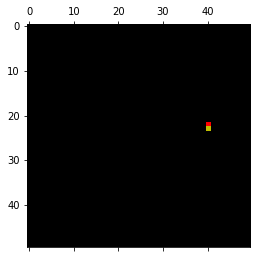

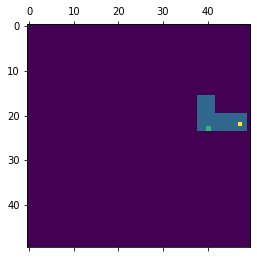

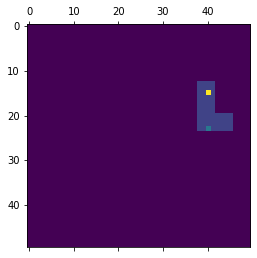

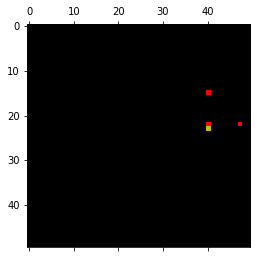

In [16]:

#Wireless sensor networm combined with autonomous drone swarm and communication reduction
#https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7391193&casa_token=wZ2spLDNZroAAAAA:YDmwxnfhCvPGV002JGv_1lSta5d7yBgcY3P0YYrw24wKr7-hJWuTdR5tTvuWe1Z4vZgFr-pgs8Y

import random as rand
import numpy as np
#rand.seed(1)
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import math
import gym
from copy import deepcopy

ViewRange = 2
CommRange = 5#5
AgentAmmount = 5
NUM_ITERS = 200
#double distance = 2/3 as efficient transfer
class Task:
    def __init__(self):
        self.priority = rand.randint(1, 10)
        self.size = rand.randint(100, 1000)



#Vessel
#Constraints: Bandwidth - Num of Chanels - communication distance
#Objective: Energy Reduction - Task priority 
class Drone:
    def __init__(self, x, y, viewRange, commRange, width, height, index, Sea):
        self.x = x
        self.y = y
        self.task = None
        self.viewRange = viewRange
        self.commRange = commRange
        self.observation = [[0]*width]*height
        self.id = index
        #self.seen = np.array([[0]*Sea.width]*Sea.height)
        self.obs = np.array([[0]*Sea.width]*Sea.height)
        self.punish = 0
    def getView(self):
        return None

    def getObservation(self, Sea):
        #Get view
        #obs = np.array([[0]*Sea.width]*Sea.height)
        reward = 0 
        for i in range(self.y-self.viewRange, self.y+self.viewRange):
            for j in range(self.x-self.viewRange, self.x+self.viewRange):
                if i < 50 and i >= 0  and j < 50 and j >= 0:
                    if Sea.board[i][j] == 0:
                        self.obs[i][j] = 1
                    else:
                        self.obs[i][j] = Sea.board[i][j]

                    if Sea.seen[i][j] == 0:
                        Sea.seen[i][j] = 1
                        reward += 1
        reward += self.punish
        res = deepcopy(self.obs)
        #make them seperate
        res[self.y][self.x] = 3 + self.id
        return res, reward

    def move(self,x, y, see):
        x = x + self.x
        y = y + self.y

        self.punish = 0

        if (x < 50 and x >= 0 and y < 50 and y >= 0) and (see.board[y][x] == 0 or see.board[y][x] == 2 or see.board[y][x] == -2) :
            self.x = x
            self.y = y
        else:
            #punishment
            self.punish -= 4

    
    def addData(self, drone):
        pass
    def setData(self, obs):
        self.observation = abs
#Constraints: Bandwidth, Num of Chanels
#Objective Explore the sea
class Ship:
    def __init__(self, x, y, bandwidth):
        self.x = x
        self.y = y
        self.bandwidth = bandwidth


#Actions move up down left right 
class Sea:

    def __init__(self):#, width, height):
        self.width = 50#width
        self.height =50# height

        self.observe_dim = 50*50#env.observation_space[0].shape[0]
        self.action_num = 4
        self.max_step = 200
        self.state_dim = 50*50
        self.action_dim = 4
        self.target_return = 50*50
        self.env_num = 500
        self.if_discrete = True
        self.possible_agents = [str(r) for r in range(5)]
        self.env_name = "Sea"
        self.reward_range = (-200*4, 50*50)
        #self.objects = objects
        #int array -2 = dead zone (ie no communication) -1 = object 0 = sea 1 = ship 2 = drone
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1

        self.cmap = ListedColormap([ 'k', 'b'])

    def AddShip(self, ship):
        self.ship = ship
        self.board[ship.y][ship.x] = 2
        for i in range(ship.y - 2, ship.y+2):
            for j in range(ship.x - 2, ship.x + 2):
                if i >= 0 and j >= 0 and i < self.height and j < self.width and self.board[i][j] == -1:
                    self.board[i][j] = 0

    def display(self):
        newBoard = np.copy(self.board)
        if ( hasattr(self, 'ship')):
            newBoard[self.ship.y][self.ship.x] = 2
            #self.calculateDeadZone2(newBoard)
            self.cmap = ListedColormap([ 'k',  'b', 'g', 'y', 'r'])

        for drone in self.drones:
            newBoard[drone.y][drone.x] = 3

        plt.matshow(newBoard, cmap=self.cmap)

    def interestMap(self):
        interest = [[0]*self.width]*self.height
        samples = np.random.multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 50)
        huh  = np.reshape(samples, (10,10))
        print(huh)
        plt.close()
        plt.matshow(huh)

    def reset(self):
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1
        self.curr_step = 0
        shipx = rand.randint(0, 49)
        shipy = rand.randint(1, 49)
        ship = Ship(shipx, shipy, 100)
        self.AddShip(ship)
        self.seen = np.array([[0]*50]*50)
        self.drones = []

        for i in range(AgentAmmount):
            self.drones.append(Drone(shipx, shipy-1,ViewRange, CommRange, self.width, self.height, i, self))
        observations, rewards = self.getObservation()

        return observations

    def step(self, actions):

        self.curr_step += 1
        for key in actions:
            act = actions[key]
            print(act)
            match act:
                case 0:
                    self.drones[int(key)].move(1,0, self)
                case 1:
                    self.drones[int(key)].move(-1,0, self)
                case 2:
                    self.drones[int(key)].move(0,1, self)
                case 3:
                    self.drones[int(key)].move(0, -1, self)
                case 4:
                    print("Im not meantr to thbe there")
                
        #count  = [0] * AgentAmmount
        #for i in range(self.height):
        #    for j in range(self.width):
        #        for drone in self.drones:
        #            if drone.seen[i][j] == 1:
        #                count[drone.id] += 1
                        
        #reward = count / float(self.width*self.height)
        #reward = [t/float(self.width*self.height) for t in count]
        env_done = self.curr_step >= self.max_step
        dones = {str(i): env_done for i in range(5)}

        info = {str(i): {} for i in range(5)}
        observations, rewards = self.getObservation()

        return observations, rewards, dones, None

    def getObservation(self):
        currentIndex = 1
        droneConnection = [0]*AgentAmmount

        for drone in self.drones:
            
            for connectDrone in self.drones:
                if drone.id == connectDrone.id:
                    continue
                if (droneConnection[drone.id] == 0 or droneConnection[drone.id] != droneConnection[connectDrone.id]) \
                            and math.sqrt( (drone.x - connectDrone.x)**2 + (drone.y - connectDrone.y)**2 ) < CommRange:
                    #do stuff
                    if droneConnection[drone.id] == 0 and droneConnection[connectDrone.id] == 0:
                        droneConnection[drone.id] = currentIndex
                        droneConnection[connectDrone.id] = currentIndex
                        currentIndex += 1
                    elif droneConnection[drone.id] != 0 and droneConnection[connectDrone.id] != 0:
                        swap = droneConnection[connectDrone.id]
                        for i in droneConnection:
                            if i == swap:
                                i = droneConnection[drone.id]
                    else:
                        if(droneConnection[drone.id] == 0):
                            droneConnection[drone.id] = droneConnection[connectDrone.id]
                        else:
                            droneConnection[connectDrone.id] = droneConnection[drone.id]

        for t in range(len(droneConnection)):
            if droneConnection[t] == 0:
                droneConnection[t] = currentIndex
                currentIndex += 1

        obsDict = {}
        rewardList = [0] * AgentAmmount
        rewardDict = {}
        index = 0
        for i in droneConnection:

            values, reward = self.drones[index].getObservation(self)

            if str(i) in obsDict:
                values = np.array(values).flatten()
                curr = obsDict[str(i)]
                
                for i in range(len(curr)):
                    
                    if(curr[i] == 1 and values[i] != 0):
                        curr[i] = values[i]
                    if(curr[i] == 0):
                        curr[i] = values[i]

            else:
                obsDict[str(i)] = np.array(values).flatten()
            
            rewardList[index]= reward
            rewardDict[str(index)] = reward
            index += 1

        observations = []
        finalObs ={}

        for i in droneConnection:
            observations.append(obsDict[str(i)])
            

        for index, i in enumerate(observations):
            finalObs[str(index)] = i
            t = deepcopy(i)
            t[t == 3] = 1
            t[ t == 4] = 1
            t[t == 5 ] = 1
            t[t == 6 ] = 1
            t[ t == 7 ] = 1
            t[ t == 8 ] = 1
            self.drones[index].obs = np.reshape(t, (50,50))


        return finalObs, rewardDict
class Object:
    def __init__(self, x, y):
        self.x = x
        self.y = y 

see = Sea()#50, 50)

see.reset()
#obs, reward, _, _ = see.step([0, 1])
#plt.matshow( np.reshape(obs[0], (50,50)) )
#plt.matshow( np.reshape(obs[1], (50,50)) )
see.display()
#obs, reward, _, _ = see.step({ "0": 0, "2": 3})
#obs, reward, _, _ = see.step([0, 4])
#obs, reward, _, _ = see.step([0, 4])
#obs, reward, _, _ = see.step([0, 4])
#print(obs)
#plt.matshow( np.reshape(obs["0"], (50,50)) )
#plt.matshow( np.reshape(obs["2"], (50,50)) )
i = 0
for i in range(10):
    obs, reward, _, _ = see.step({ "0": 0, "2": 3})
    plt.matshow( np.reshape(obs["0"], (50,50)) )
    plt.matshow( np.reshape(obs["2"], (50,50)) )
    input("Enter: ")
    


see.display()
#plt.matshow(seen)
print(reward)
#obs, reward, _, _ = see.step([0, 1])
#plt.matshow( np.reshape(obs[0], (50,50)) )
#plt.matshow( np.reshape(obs[1], (50,50)) )
#see.display()

#print(reward)



In [ ]:
from mava.systems.tf import mappo


mappo.MAPPO()